# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data
if 'test.p' not in os.listdir():
    !wget https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
    !unzip traffic-signs-data.zip

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [2]:
# Import Some Libraries
import pandas as pd
import numpy as np
import tensorflow as tf

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = x_train.shape[0]

# TODO: Number of validation examples
n_validation = x_valid.shape[0]

# TODO: Number of testing examples.
n_test = x_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = x_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
# Get ID2Name Label Mapping
label_names = pd.read_csv('signnames.csv')
label_names['TrainingCount'] = [len(y_train[y_train==ClassId]) for ClassId in label_names.ClassId]
label_names['TrainingFrequency'] = [np.round(100*len(y_train[y_train==ClassId])/len(y_train),2) 
                                     for ClassId in label_names.ClassId]
label_names

,ClassId,SignName,TrainingCount,TrainingFrequency
0,0,Speed limit (20km/h),180,0.52
1,1,Speed limit (30km/h),1980,5.69
2,2,Speed limit (50km/h),2010,5.78
3,3,Speed limit (60km/h),1260,3.62
4,4,Speed limit (70km/h),1770,5.09
5,5,Speed limit (80km/h),1650,4.74
6,6,End of speed limit (80km/h),360,1.03
7,7,Speed limit (100km/h),1290,3.71
8,8,Speed limit (120km/h),1260,3.62
9,9,No passing,1320,3.79


In [6]:
print('Minimum Count:\t',label_names.TrainingCount.min())
print('Q1 Count:\t',label_names.TrainingCount.quantile(0.25))
print('Median Count:\t',label_names.TrainingCount.median())
print('Q3 Count:\t',label_names.TrainingCount.quantile(0.75))
print('Maximum Count:\t',label_names.TrainingCount.max())

Minimum Count:	 180
Q1 Count:	 285.0
Median Count:	 540.0
Q3 Count:	 1275.0
Maximum Count:	 2010


In [7]:
# Here we will look at several examples of the various signs
speed_limit_20km  = np.concatenate([x_train[y_train==0, :,:,:][k*10] for k in range(10)],axis=1)
yield_sign        = np.concatenate([x_train[y_train==13,:,:,:][k*10] for k in range(10)],axis=1)
stop_sign         = np.concatenate([x_train[y_train==14,:,:,:][k*10] for k in range(10)],axis=1)
general_caution   = np.concatenate([x_train[y_train==18,:,:,:][k*10] for k in range(10)],axis=1)
double_curve      = np.concatenate([x_train[y_train==21,:,:,:][k*10] for k in range(10)],axis=1)
bumpy_road        = np.concatenate([x_train[y_train==22,:,:,:][k*10] for k in range(10)],axis=1)
traffic_signals   = np.concatenate([x_train[y_train==26,:,:,:][k*10] for k in range(10)],axis=1)
pedestrians       = np.concatenate([x_train[y_train==27,:,:,:][k*10] for k in range(10)],axis=1)
children_crossing = np.concatenate([x_train[y_train==28,:,:,:][k*10] for k in range(10)],axis=1)
beware_of_ice     = np.concatenate([x_train[y_train==30,:,:,:][k*10] for k in range(10)],axis=1)
wild_animals      = np.concatenate([x_train[y_train==31,:,:,:][k*10] for k in range(10)],axis=1)
turn_left_ahead   = np.concatenate([x_train[y_train==34,:,:,:][k*10] for k in range(10)],axis=1)
roundabout        = np.concatenate([x_train[y_train==40,:,:,:][k*10] for k in range(10)],axis=1)



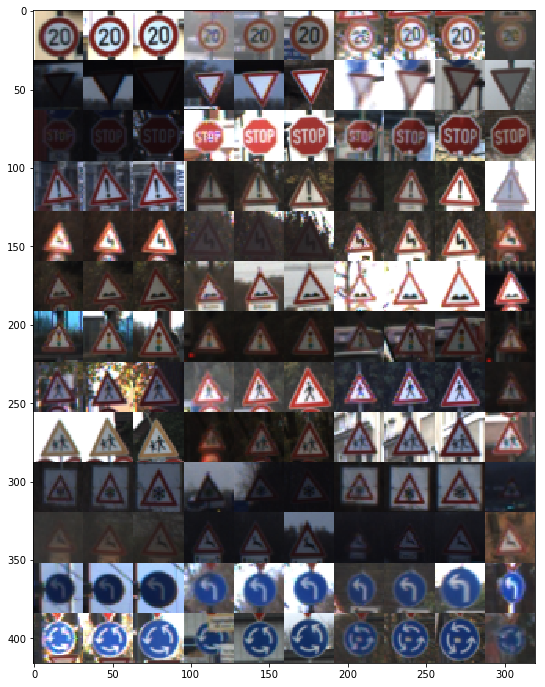

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(np.concatenate([
    speed_limit_20km, yield_sign, stop_sign, 
    general_caution, double_curve, bumpy_road, traffic_signals,
    pedestrians, children_crossing,
    beware_of_ice, wild_animals, turn_left_ahead,
    roundabout],axis=0))


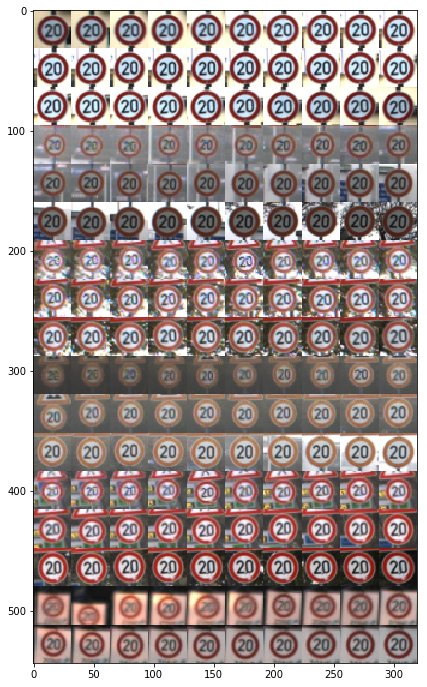

In [9]:
small_class_ex = y_train==0
speed_limit_20km = np.concatenate([
        np.concatenate([x_train[small_class_ex][k+j*10,:,:] for k in range(10)], axis=1)
        for j in range(17)], axis=0)

plt.figure(figsize=(12,12))
plt.imshow(speed_limit_20km)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, **the validation set accuracy will need to be at least 0.93**. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Undersampling
I found that undersampling each class down to the minimum class size (180) limits the data
enough to ruin the results.

#### Median Sampling


#### Side Note: SMOTE
I first tried to get SMOTE to work from the Imbalanced-Learn package... After some finagling,
I could only get it to generate very noisy images that did not resemble their class.
Here's the code for future experimentation purposes.

```python
from imblearn.over_sampling import SMOTE
x_trn_flat = X_train.reshape((X_train.shape[0],-1))
sm = SMOTE(random_state=12, ratio = 1.0)
x_smote, y_smote = sm.fit_sample(x_trn_flat, y_train)
small_class_ex = y_res==0
x_trn_smote = x_smote.reshape((-1,32,32,3))
speed_limit_20km = np.concatenate([
        np.concatenate([x_trn_smote[small_class_ex][k+j*10,:,:] for k in range(10)], axis=1)
        for j in range(50)], axis=0)
plt.figure(figsize=(12,12))
plt.imshow(speed_limit_20km)
```

#### Side Note: GAN
I then tried to generate data using the GAN I developed in Udacity's Deep Learning nanodegree.
However, it is developed in one of the latest versions of TensorFlow and the CarND Conda environment
uses TF 0.12 (why?).  After wasting several hours trying to convert all the TF1.x code to TF0.12 code,
I was still getting bugs... So then I tried to "pip install --upgrade tensorflow-gpu", but that royally
screwed up the TensorFlow installation and "import tensorflow as tf" would no longer work without
error.  Using the GAN would have been interesting and satisfying, but I'm so behind in this course, I
have to opt to do the simplest thing possible:  balance the classes by undersampling the over-represented
classes.

In [10]:
# Need OpenCv
has_opencv = !conda list | grep opencv 
if not has_opencv: import cv2



In [11]:
np.median([np.sum(y_train==target) for target in np.unique(y_train)])

540.0

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

min_class_size1 = label_names.TrainingCount.min() # 180
min_class_size2 = min([np.sum(y_train==target) for target in np.unique(y_train)]) # 180

# Preprocess
import cv2
from sklearn.utils import shuffle

def preprocess(x_data, y_data, sample=None, under_sample=False, median_sample=False, grayscale=True):        
    
    # Shuffle
    x_data, y_data = shuffle(x_data, y_data)
    
    # Balance Classes (?)
    if sample is not None:
        if sample=='median':
            # Balance Size 
            med_class_size = int(np.median([np.sum(y_data==target) for target in np.unique(y_data)]))
            # Begin Balancing Act!
            x_data_bal = [];  y_data_bal = []
            for i in range(n_classes):
                index = y_data==i
                class_size = index.sum()
                # Larger than Median
                if class_size > med_class_size:
                    x_data_bal.append(x_data[index][:med_class_size])
                    y_data_bal.append(y_data[index][:med_class_size])
                elif class_size <= med_class_size:
                    stack_size = int(np.ceil(med_class_size / class_size))
                    x_stack = np.concatenate([x_data[index,:,:,:] for i in range(stack_size)], axis=0)
                    y_stack = np.concatenate([y_data[index] for i in range(stack_size)], axis=0)
                    x_stack, y_stack = shuffle(x_stack, y_stack)
                    x_data_bal.append(x_stack[:med_class_size])
                    y_data_bal.append(y_stack[:med_class_size])
            x_data = np.concatenate(x_data_bal, axis=0)
            y_data = np.concatenate(y_data_bal, axis=0)
        if sample=='halfmax2max':
            # Balance Size 
            hm2m_class_size = int(np.max([np.sum(y_data==target) for target in np.unique(y_data)])/2)
            # Begin Balancing Act!
            x_data_bal = [];  y_data_bal = []
            for i in range(n_classes):
                index = y_data==i
                class_size = index.sum()
                # Larger than HalfMax: Keep all of it!
                if class_size > hm2m_class_size:
                    x_data_bal.append(x_data[index])
                    y_data_bal.append(y_data[index])
                # Smaller than HalfMax: Scale up to HalfMax!
                elif class_size <= hm2m_class_size:
                    stack_size = int(np.ceil(hm2m_class_size / class_size))
                    x_stack = np.concatenate([x_data[index,:,:,:] for i in range(stack_size)], axis=0)
                    y_stack = np.concatenate([y_data[index] for i in range(stack_size)], axis=0)
                    x_stack, y_stack = shuffle(x_stack, y_stack)
                    x_data_bal.append(x_stack[:hm2m_class_size])
                    y_data_bal.append(y_stack[:hm2m_class_size])
            x_data = np.concatenate(x_data_bal, axis=0)
            y_data = np.concatenate(y_data_bal, axis=0)
        elif sample=='over':
            # Balance Size 
            max_class_size = int(np.max([np.sum(y_data==target) for target in np.unique(y_data)]))
            # Begin Balancing Act!
            x_data_bal = [];  y_data_bal = []
            for i in range(n_classes):
                index = y_data==i
                class_size = index.sum()
                stack_size = int(np.ceil(max_class_size / class_size))
                x_stack = np.concatenate([x_data[index,:,:,:] for i in range(stack_size)], axis=0)
                y_stack = np.concatenate([y_data[index] for i in range(stack_size)], axis=0)
                x_stack, y_stack = shuffle(x_stack, y_stack)
                x_data_bal.append(x_stack[:max_class_size])
                y_data_bal.append(y_stack[:max_class_size])
            x_data = np.concatenate(x_data_bal, axis=0)
            y_data = np.concatenate(y_data_bal, axis=0)
        elif sample=='under':
            # Balance Size 
            min_class_size = min([np.sum(y_data==target) for target in np.unique(y_data)])
            # Begin Balancing Act!
            x_data_bal = [];  y_data_bal = []
            for i in range(n_classes):
                index = y_data==i
                x_data_bal.append(x_data[index,:,:,:][0:min_class_size])
                y_data_bal.append(y_data[index][0:min_class_size])
            x_data = np.concatenate(x_data_bal, axis=0)
            y_data = np.concatenate(y_data_bal, axis=0)
    
    
    # Grayscale
    if grayscale:
        x_data = np.array(
            [[cv2.cvtColor(x_data[img], cv2.COLOR_RGB2GRAY) for img in range(len(x_data))]]
        )
        shape = x_data.shape
        x_data = x_data.reshape((shape[1],shape[2],shape[3],shape[0]))
        
    # Normalize
    x_data = (x_data.astype(int) - 128) / 128

    return x_data, y_data

In [13]:
# PREPROCESSED DATA
x_trn, y_trn = preprocess(x_train, y_train, sample='halfmax2max', grayscale=True)
x_val, y_val = preprocess(x_valid, y_valid, sample='halfmax2max', grayscale=True)
x_tst, y_tst = preprocess(x_test, y_test, grayscale=True)


x_trn.shape

(51825, 32, 32, 1)

### What does the preprocessed data look like?

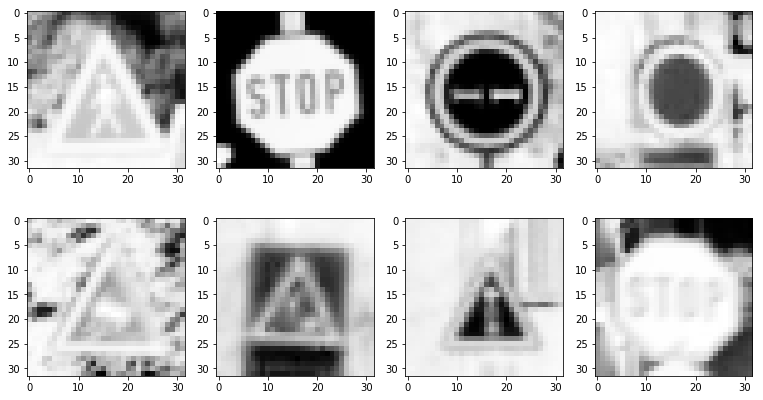

In [43]:
fig = plt.figure(figsize=(13,7))
for idx,img in enumerate(x_trn[:8]):
    subplot = fig.add_subplot(2,4,idx+1)
    plt.imshow(img.squeeze(), cmap='Greys')

### What is new balance in the data set?

In [65]:
# Get ID2Name Label Mapping
label_names_balanced = pd.read_csv('signnames.csv')
label_names_balanced['TrainingCount'] = [len(y_trn[y_trn==ClassId]) for ClassId in label_names_balanced.ClassId]
label_names_balanced['TrainingFrequency'] = [np.round(100*len(y_trn[y_trn==ClassId])/len(y_trn),2) 
                                     for ClassId in label_names_balanced.ClassId]
label_names_balanced

,ClassId,SignName,TrainingCount,TrainingFrequency
0,0,Speed limit (20km/h),1005,1.94
1,1,Speed limit (30km/h),1980,3.82
2,2,Speed limit (50km/h),2010,3.88
3,3,Speed limit (60km/h),1260,2.43
4,4,Speed limit (70km/h),1770,3.42
5,5,Speed limit (80km/h),1650,3.18
6,6,End of speed limit (80km/h),1005,1.94
7,7,Speed limit (100km/h),1290,2.49
8,8,Speed limit (120km/h),1260,2.43
9,9,No passing,1320,2.55


### Model Architecture
#### Convolutional Layers

In [14]:
def conv(x_tensor, num_outputs, kernel_size, kernel_strides, pool_size, pool_strides, padding='SAME',
                  activation=None, keep_prob=None): 
    """
    Apply convolution then max pooling to x_tensor.  Note that the num_outputs parameters
    is for the convolutional layer; if max pooling is applied, the number of outputs from
    this function will likely differ.
    :param x_tensor: TensorFlow Tensor
    :param num_outputs:    number of outputs for conv_layer
    :param kernel_size:    scalar or 2-D Tuple
    :param kernel_strides: scalar or 2-D Tuple
    :param pool_size:      scalar 2-D Tuple 
    :param pool_strides:   scalar or 2-D Tuple 
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    kernel_size_type = str(type(kernel_size)).split("'")[1] 
    if kernel_size_type in ('int','float'):
        filt_h = kernel_size;    filt_w = kernel_size
    elif kernel_size_type in ('list','tuple'):
        filt_h = kernel_size[0];    filt_w = kernel_size[1]
    
    kernel_strides_type = str(type(kernel_strides)).split("'")[1] 
    if kernel_strides_type in ('int','float'):
        fstr_h = kernel_strides;  fstr_w = kernel_strides
    elif kernel_strides_type in ('list','tuple'):
        fstr_h = kernel_strides[0];  fstr_w = kernel_strides[1]
    
    pool_size_type = str(type(pool_size)).split("'")[1] 
    if pool_size_type in ('int','float'):
        pool_h = pool_size;    pool_w = pool_size
    elif pool_size_type in ('list','tuple'):
        pool_h = pool_size[0];    pool_w = pool_size[1]
    
    pool_strides_type = str(type(pool_strides)).split("'")[1] 
    if pool_strides_type in ('int','float'):
        pstr_h = pool_strides;  pstr_w = pool_strides
    elif pool_strides_type in ('list','tuple'):
        pstr_h = pool_strides[0];  pstr_w = pool_strides[1]
    
    x_h = x_tensor.get_shape()[1].value
    x_w = x_tensor.get_shape()[2].value
    x_d = x_tensor.get_shape()[3].value
    n_features = filt_h * filt_w * x_d
    
    #=======================================
    # Layer Parameters
    #=======================================
    weights = tf.Variable(tf.truncated_normal([filt_h, filt_w, x_d, num_outputs],
                                               mean=0, stddev=np.sqrt(2.0/n_features)))
    bias = tf.Variable(tf.zeros([num_outputs]))
            
    #=======================================
    # Convolution Layer
    #=======================================
    conv_layer = tf.nn.conv2d(x_tensor, weights, strides=[1,fstr_h,fstr_w,1], padding=padding )
    conv_layer = tf.nn.bias_add(conv_layer, bias )
    
    #=======================================
    # Activation Function
    #=======================================
    if activation == 'relu':
        conv_layer = tf.nn.relu(conv_layer)
    elif activation == 'sigmoid':
        conv_layer = tf.nn.sigmoid(conv_layer)
    elif activation == 'tanh':
        conv_layer = tf.nn.tanh(conv_layer)
    elif activation == 'softplus':
        conv_layer = tf.nn.softplus(conv_layer)
    
    #=======================================
    # Max Pooling Option
    #=======================================
    conv_layer = tf.nn.max_pool(conv_layer, ksize=[1,pool_h,pool_w,1], 
                                strides=[1,pstr_h,pstr_w,1], padding=padding)
    
    #=======================================
    # Drop Out Option
    #=======================================
    if keep_prob != None:
        conv_layer = tf.nn.dropout(conv_layer, keep_prob)
    
    return conv_layer 


#### Dense Layers

In [15]:
def dense(x_tensor, num_outputs, activation=None, keep_prob=None): 
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param num_outputs: Number of outputs for the dense layer
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    
    n_features = x_tensor.get_shape()[1].value
    
    #=======================================
    # Layer Parameters
    #=======================================
    weights = tf.Variable(
        tf.truncated_normal([n_features, num_outputs], mean=0, stddev=np.sqrt(2.0/n_features)), 
        name="weights")
    bias = tf.Variable(tf.zeros([num_outputs]), name="bias")
            
    #=======================================
    # Dense / Fully-Connected Layer
    #=======================================
    dense_layer = tf.matmul(x_tensor, weights) + bias
    
    
    #=======================================
    # Activation Function
    #=======================================
    if activation == 'relu':
        dense_layer = tf.nn.relu(dense_layer, name="relu")
    elif activation == 'sigmoid':
        dense_layer = tf.nn.sigmoid(dense_layer, name="sigmoid")
    elif activation == 'tanh':
        dense_layer = tf.nn.tanh(dense_layer, name="tanh")
    elif activation == 'softplus':
        dense_layer = tf.nn.softplus(dense_layer, name="softplus")
    
    #=======================================
    # Drop Out Option
    #=======================================
    if keep_prob != None:
        dense_layer = tf.nn.dropout(dense_layer, keep_prob)
    
    return dense_layer 


#### The Network

In [16]:
def SignNet(x, keep_prob, n_classes=43, print_shapes=False):    
            
    shapes = []
    # Layer 1 Parameters
    with tf.name_scope("conv1"):
        conv_layer = conv(x, num_outputs=16, kernel_size=3, kernel_strides=1, 
                     pool_size=2, pool_strides=1, activation='relu', keep_prob=keep_prob)
    shapes.append(conv_layer.get_shape().as_list())
    
    # Layer 2 Parameters
    with tf.name_scope("conv2"):
        conv_layer = conv(conv_layer, num_outputs=32, kernel_size=3, kernel_strides=1, 
                     pool_size=2, pool_strides=1, activation='relu', keep_prob=keep_prob)
    shapes.append(conv_layer.get_shape().as_list())
        
    # Layer 3 Parameters
    with tf.name_scope("conv3"):
        conv_layer = conv(conv_layer, num_outputs=64, kernel_size=3, kernel_strides=1, 
                     pool_size=2, pool_strides=2, activation='relu', keep_prob=keep_prob)
    shapes.append(conv_layer.get_shape().as_list())
    
    # Layer 4 Parameters
    #with tf.name_scope("conv4"):
    #    conv_layer = conv(conv_layer, num_outputs=128, kernel_size=3, kernel_strides=1, 
    #                 pool_size=1, pool_strides=1, activation='relu', keep_prob=keep_prob)
    #shapes.append(conv_layer.get_shape().as_list())
    
    
    # Flatten. 
    shape = conv_layer.get_shape().as_list()
    flath, flatw, flatd = shape[1], shape[2], shape[3]
    flatx = tf.reshape(conv_layer, shape=(-1, flath*flatw*flatd))
    
    # Layer 3 Parameters
    with tf.name_scope("dense1"):
        dense_layer = dense(flatx, 86, activation='relu', keep_prob=keep_prob)
    shapes.append(dense_layer.get_shape().as_list())

    # Layer 4: Output Layer
    with tf.name_scope("logits"):
        logits = dense(dense_layer, n_classes, activation=None, keep_prob=None)
    shapes.append(logits.get_shape().as_list())
    
    if print_shapes==True:
        #print('Conv1:', conv1.get_shape().as_list())
        #print('Conv2:', conv2.get_shape().as_list())
        #print('Dense1: ', dense1.get_shape().as_list())
        #print('Dense2: ', dense2.get_shape().as_list())
        #print('Logits:', logits.get_shape().as_list())
        for shape in shapes: print(shape)
    else:
        return logits
    
# LEFT OFF: making last conv layer a 1x1

In [17]:
# Look at Layer Shapes
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
keep_prob = tf.placeholder(tf.float32)
SignNet(x, keep_prob, print_shapes=True)

[None, 32, 32, 16]
[None, 32, 32, 32]
[None, 16, 16, 64]
[None, 86]
[None, 43]


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
# Model Evaluation Function
def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 7
BATCH_SIZE = 128
LEARNING_RATE = 0.005
ORIG_DEPTH = x_trn.shape[-1]
KEEP_PROB_TRAIN = 0.7

# Training Graph
x = tf.placeholder(tf.float32, (None, 32, 32, ORIG_DEPTH))
y = tf.placeholder(tf.int32,   (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)
logits = SignNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)
# Validation Graph
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Model Saver
saver = tf.train.Saver()

# Train Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_trn)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_trn, y_trn = shuffle(x_trn, y_trn)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_trn[offset:end], y_trn[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB_TRAIN})
            
        training_accuracy = evaluate(x_trn, y_trn)
        validation_accuracy = evaluate(x_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './signNet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.669
Validation Accuracy = 0.562

EPOCH 2 ...
Training Accuracy = 0.966
Validation Accuracy = 0.903

EPOCH 3 ...
Training Accuracy = 0.984
Validation Accuracy = 0.948

EPOCH 4 ...
Training Accuracy = 0.981
Validation Accuracy = 0.942

EPOCH 5 ...
Training Accuracy = 0.986
Validation Accuracy = 0.951

EPOCH 6 ...
Training Accuracy = 0.993
Validation Accuracy = 0.967

EPOCH 7 ...
Training Accuracy = 0.993
Validation Accuracy = 0.962

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [28]:
!mkdir -p german_signs_from_internet

# Bumpy Road
!wget http://storage.torontosun.com/v1/blogs-prod-photos/e/4/3/8/0/e43800d91b0c525906f0fbfb93f5b527.jpg?stmp=1290377910 -O german_signs_from_internet/bumpy_road1.jpg

# General Caution
!wget http://storage.torontosun.com/v1/blogs-prod-photos/3/9/1/8/1/3918169fbec64aa0eba9fb1d212fc128.jpg?stmp=1290377394 -O german_signs_from_internet/general_caution1.jpg

# Road Work
!wget http://www.springdot.org/baustelle/02/02.jpg -O german_signs_from_internet/road_work1.jpg

# Turn Left Ahead
!wget https://cdn.xl.thumbs.canstockphoto.com/canstock36280602.jpg -O german_signs_from_internet/turn_left_ahead1.jpg
    
# Wild Animals
!wget https://www.swarco.com/var/em_plain_site/storage/images/media/images/swarco-traffic-systems/news-events-highlights/swarco_sts_fachtagung_wild_720x360rgb/48656-1-eng-US/SWARCO_STS_Fachtagung_Wild_720x360rgb_795x530px.jpg -O german_signs_from_internet/wild_animals1.jpg
    
# Speed Limit 80
!wget http://www.rentalcars.com/images/seo_graphics/driving-laws/speed-limit-sign-800-359.jpg -O german_signs_from_internet/speed_limit_80.jpg

# Speed Limit 40    
!wget http://www.telegraph.co.uk/cars/images/2017/05/15/TELEMMGLPICT000126497396_trans_NvBQzQNjv4Bqq6GZV2TOCTHAqKdXYOVHJGbWgOafkjRCkN60-0kSgNg.jpeg?imwidth=450 -O german_signs_from_internet/speed_limit_40.jpg

# Speed Limit 30
!wget http://l450v.alamy.com/450v/crxtdm/speed-limit-sign-30-between-6-20-hrs-prien-upper-bavaria-germany-crxtdm.jpg -O german_signs_from_internet/speed_limit_30.jpg

--2017-10-18 12:11:48--  http://storage.torontosun.com/v1/blogs-prod-photos/e/4/3/8/0/e43800d91b0c525906f0fbfb93f5b527.jpg?stmp=1290377910
Resolving storage.torontosun.com (storage.torontosun.com)... 192.33.31.70
Connecting to storage.torontosun.com (storage.torontosun.com)|192.33.31.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174481 (170K) [image/jpeg]
Saving to: ‘german_signs_from_internet/bumpy_road1.jpg’

german_signs_from_i 100%[===================>] 170.39K  --.-KB/s    in 0.003s  

2017-10-18 12:11:48 (52.4 MB/s) - ‘german_signs_from_internet/bumpy_road1.jpg’ saved [174481/174481]

--2017-10-18 12:11:48--  http://storage.torontosun.com/v1/blogs-prod-photos/3/9/1/8/1/3918169fbec64aa0eba9fb1d212fc128.jpg?stmp=1290377394
Resolving storage.torontosun.com (storage.torontosun.com)... 192.33.31.70
Connecting to storage.torontosun.com (storage.torontosun.com)|192.33.31.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 465341 (454

### Load and Output the Images

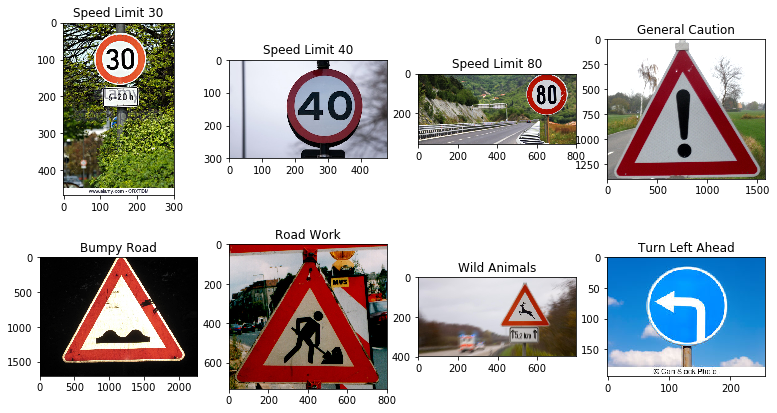

In [80]:
### Load the images and plot them here.
from PIL import Image
cat01 =            ('Speed Limit 30',  'german_signs_from_internet/speed_limit_30.jpg', 1)
cat02 =            ('Speed Limit 40',  'german_signs_from_internet/speed_limit_40.jpg', 2)
cat05 =            ('Speed Limit 80',  'german_signs_from_internet/speed_limit_80.jpg', 5)
cat18 = ('General Caution', 'german_signs_from_internet/general_caution1.jpg', 18)
cat22 =      ('Bumpy Road',      'german_signs_from_internet/bumpy_road1.jpg', 22)
cat25 =       ('Road Work',       'german_signs_from_internet/road_work1.jpg', 25)
cat31 =    ('Wild Animals',    'german_signs_from_internet/wild_animals1.jpg', 31)
cat34 = ('Turn Left Ahead', 'german_signs_from_internet/turn_left_ahead1.jpg', 34)


### Feel free to use as many code cells as needed.
fig = plt.figure(figsize=(13,7))
signs = [cat01, cat02, cat05, cat18, cat22, cat25, cat31, cat34]
for idx,sign in enumerate(signs):
    with Image.open(sign[1]) as img:
        subplot = fig.add_subplot(2,4,idx+1)
        subplot.set_title(sign[0])
        plt.imshow(img)        

In [45]:
help(Image.open(sl30[1]).crop((0,0,300,300)).resize)

Help on method resize in module PIL.Image:

resize(size, resample=0) method of PIL.Image.Image instance
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:attr:`PIL.Image.NEAREST`, :py:attr:`PIL.Image.BOX`,
       :py:attr:`PIL.Image.BILINEAR`, :py:attr:`PIL.Image.HAMMING`,
       :py:attr:`PIL.Image.BICUBIC` or :py:attr:`PIL.Image.LANCZOS`.
       If omitted, or if the image has mode "1" or "P", it is
       set :py:attr:`PIL.Image.NEAREST`.
       See: :ref:`concept-filters`.
    :returns: An :py:class:`~PIL.Image.Image` object.



# Crop and Resize Images

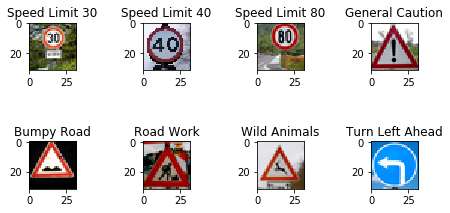

In [97]:
dwnsmpl = Image.LANCZOS
img1_c01 = Image.open(sl30[1]).crop((0,0,300,300)).resize((32,32), dwnsmpl)
img2_c02 = Image.open(sl40[1]).crop((150,0,450,300)).resize((32,32))
img3_c05 = Image.open(sl80[1]).crop((800-359,0,800,359)).resize((32,32), dwnsmpl)
img4_c18   = Image.open(general_caution[1]).crop((100,0,1494,1394)).resize((32,32), dwnsmpl)
img5_c22   = Image.open(bumpy_road[1]).crop((250,0,2200,1950)).resize((32,32), dwnsmpl)
img6_c25   = Image.open(road_work[1]).crop((35,0,765,730)).resize((32,32), dwnsmpl)
img7_c31   = Image.open(wild_animals[1]).crop((795-398,0,795-100,398-100)).resize((32,32), dwnsmpl)
img8_c34   = Image.open(turn_left_ahead[1]).crop((60,10,200,150)).resize((32,32), dwnsmpl)


fig = plt.figure(figsize=(8,4))
signs32 = [img1_c01, img2_c02, img3_c05, img4_c18, img5_c22, img6_c25, img7_c31, img8_c34]
xxx = dict()
yyy = dict()
for idx,img in enumerate(signs32):
    subplot = fig.add_subplot(2,8,idx*2+1)
    subplot.set_title(signs[idx][0])
    plt.imshow(img)
    # Create Numpy Arrays (to be preprocessed)
    name = signs[idx][0]
    xxx[name] = np.expand_dims(np.array(img),0)
    yyy[name] = np.array(signs[idx][2], ndmin=1)
    img.close()

### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
xxx.keys()

dict_keys(['Speed Limit 80', 'General Caution', 'Wild Animals', 'Road Work', 'Turn Left Ahead', 'Speed Limit 40', 'Speed Limit 30', 'Bumpy Road'])

In [89]:
with tf.Session() as sess:
    # Restore model variables
    saver.restore(sess, "./signNet")
    print("Model restored.")
    for idx,img in enumerate(x_val[:10]):
        one_hot_y = tf.one_hot(y_val[idx], n_classes)
        logits = SignNet(x, keep_prob)
        sess.run(logits, feed_dict={x: img, keep_prob: 1.0})
        tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    

Model restored.


In [96]:
y_pred[5].argmax()
y_trn[0]

27

In [87]:
name = 'Speed Limit 80'
ppx = preprocess(xxx[name], yyy[name], grayscale=True)

with tf.Session() as sess:
    # Restore model variables
    saver.restore(sess, "./signNet")
    print("Model restored.")
    ppy = sess.run(tf.nn.sigmoid(logits), feed_dict={x: ppx[0], keep_prob: 1.0})
    print(ppy.argmax())
print(ppx[1])

Model restored.
25
[5]


[5]


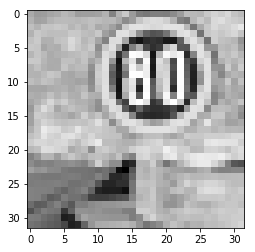

In [84]:
print(yyy[name])
plt.imshow(ppx[0].squeeze(), cmap='Greys')

In [220]:
label_names

,ClassId,SignName,TrainingCount,TrainingFrequency
0,0,Speed limit (20km/h),180,0.52
1,1,Speed limit (30km/h),1980,5.69
2,2,Speed limit (50km/h),2010,5.78
3,3,Speed limit (60km/h),1260,3.62
4,4,Speed limit (70km/h),1770,5.09
5,5,Speed limit (80km/h),1650,4.74
6,6,End of speed limit (80km/h),360,1.03
7,7,Speed limit (100km/h),1290,3.71
8,8,Speed limit (120km/h),1260,3.62
9,9,No passing,1320,3.79


### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")